<a href="https://colab.research.google.com/github/Larissa-Rocha/2D-steady-state-heat-equation/blob/master/M%C3%B3dulo%201%20-%20Fundamentos/Trabalho%20pr%C3%A1tico/Trabalho_Pr%C3%A1tico_M%C3%B3dulo_1_Bootcamp_IGTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


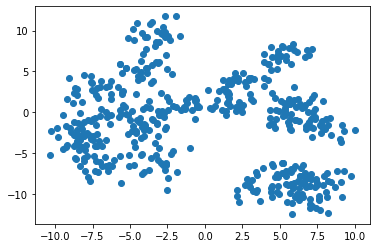

In [ ]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n) #n é o número ideal de clusters para esta amostra

4


In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print('Clusters:', i, ' / wcss =', wcss[i-1])

Clusters: 1  / wcss = 31547.372471390485
Clusters: 2  / wcss = 16949.214472147927
Clusters: 3  / wcss = 9464.847250570496
Clusters: 4  / wcss = 6005.101775346179
Clusters: 5  / wcss = 4717.404091931214
Clusters: 6  / wcss = 3662.6403286096665
Clusters: 7  / wcss = 2977.3967334561503
Clusters: 8  / wcss = 2490.8650903123416
Clusters: 9  / wcss = 2051.8254265762266
Clusters: 10  / wcss = 1841.19600847729
Clusters: 11  / wcss = 1648.846177822996
Clusters: 12  / wcss = 1475.8541672075776
Clusters: 13  / wcss = 1307.1192843443162
Clusters: 14  / wcss = 1161.327385164745
Clusters: 15  / wcss = 1060.4577514970279
Clusters: 16  / wcss = 973.9580330792269
Clusters: 17  / wcss = 908.095308959435
Clusters: 18  / wcss = 852.4880732198886
Clusters: 19  / wcss = 788.7645570283651


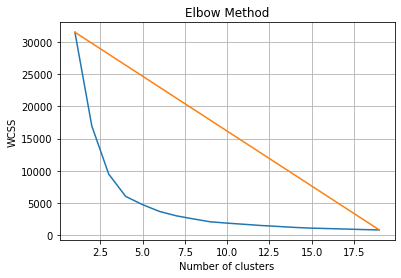

In [ ]:
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

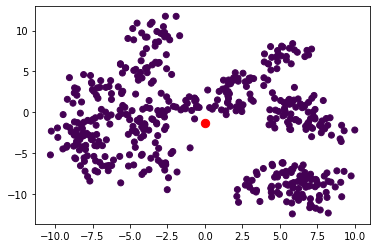

In [ ]:
#executando o kmeans com 1 cluster:

kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

In [ ]:
kmeans.cluster_centers_[:,0]

array([0.02618523])

In [ ]:
kmeans.cluster_centers_[:,1]

array([-1.30384304])